In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'Scripts'))
import visualisation

# Milestone 1

In [2]:
data_1=pd.read_csv('../data/derivatives/DATA.csv')

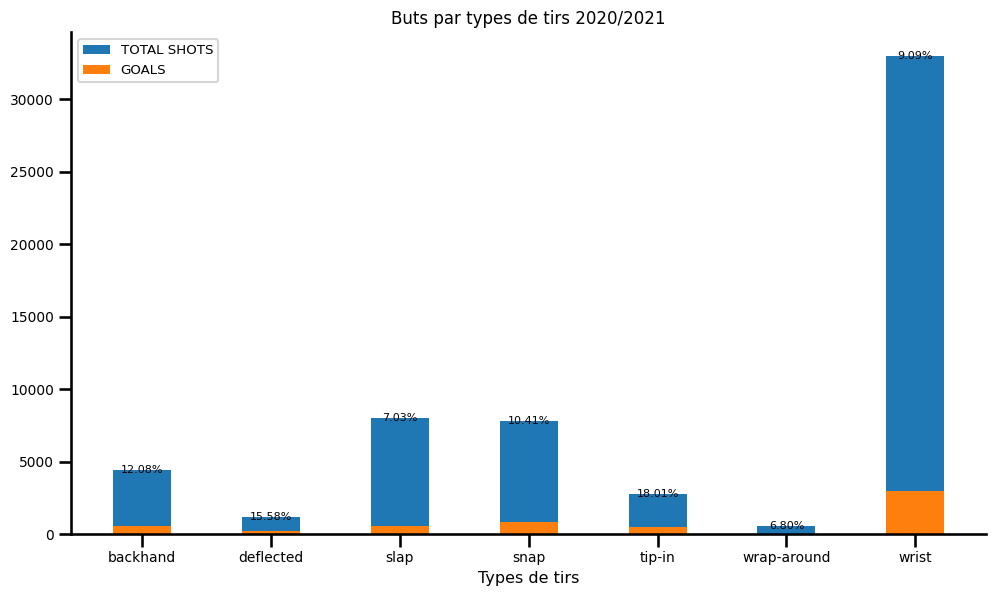

In [3]:
visualisation.shots_goals(data_1, 2020, log=False)

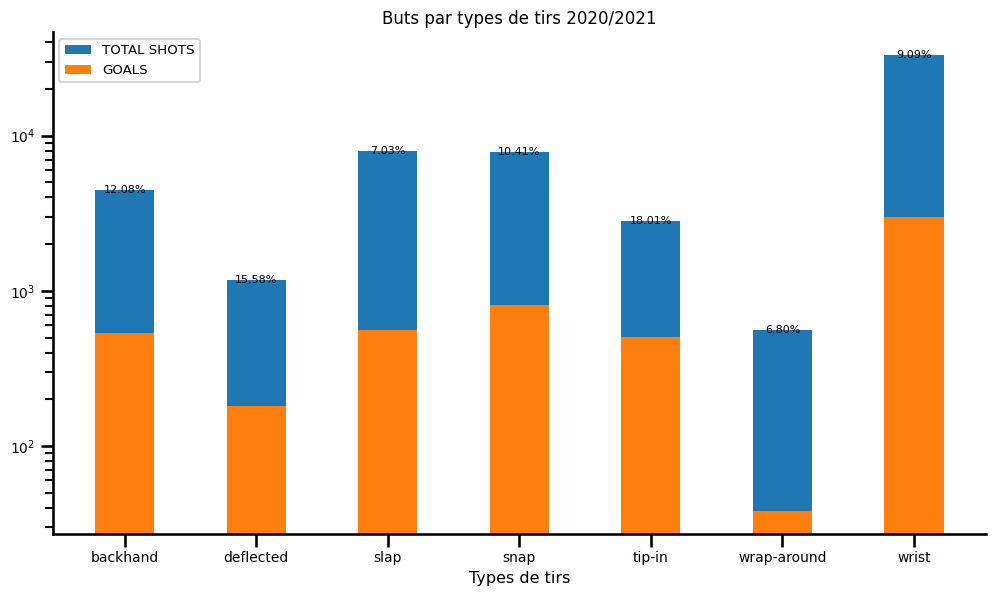

In [4]:
visualisation.shots_goals(data_1, 2020, log=True)

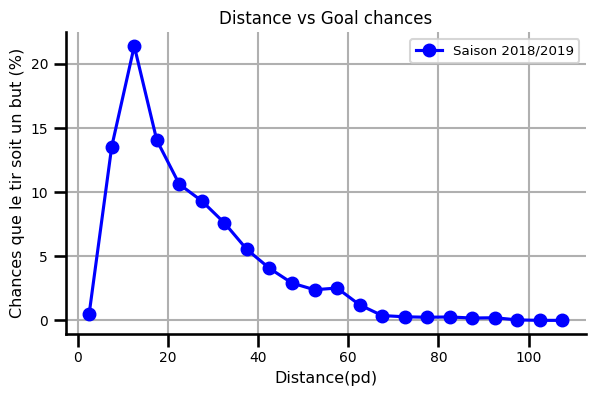

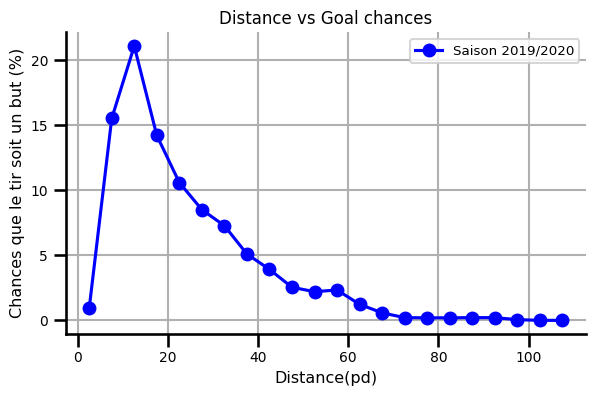

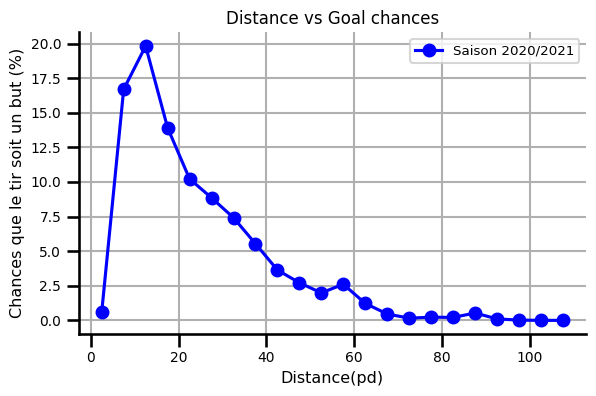

In [5]:
visualisation.Distance_goals(data_1, 2018)
visualisation.Distance_goals(data_1, 2019)
visualisation.Distance_goals(data_1, 2020)

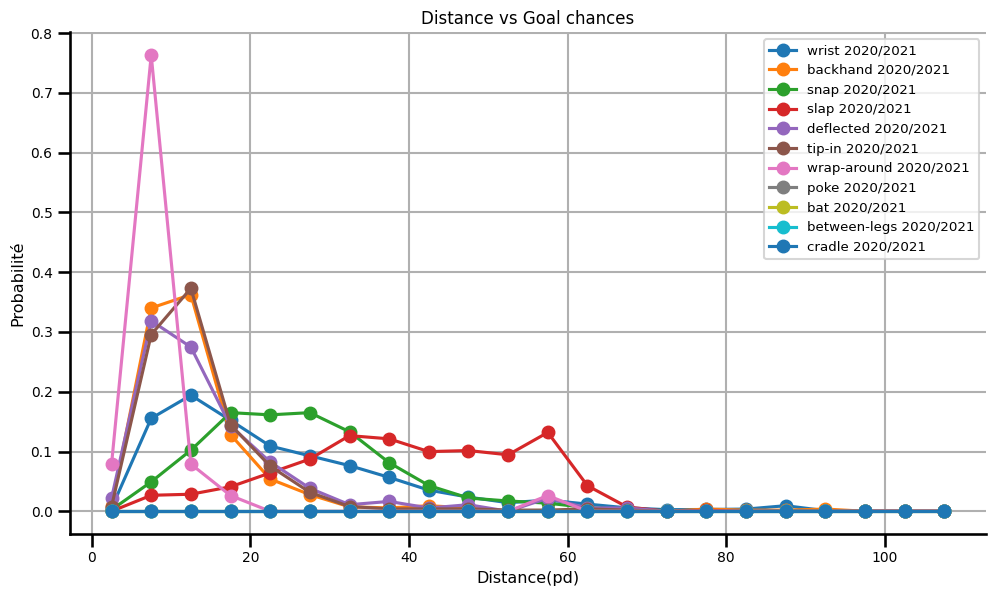

In [6]:
visualisation.Distance_goals_shots(data_1, 2020)

## dt contient tout les coordonnées ramenées à la zone offensive

In [9]:
new_df = visualisation.Offensive_coords(data_1)

In [38]:
new_df = data_1

In [39]:
new_df['overallx'] = new_df.groupby(['gameId', 'prd', 'team'])['coord_x'].transform('sum')
new_df['shooting_side']= new_df['overallx'].apply(lambda x: -1 if x<0 else 1)
def flip_y (x, y):
    if x > 0:
        y= -y
    return y

new_df['new_x']= abs(100-abs(new_df['coord_x']))
new_df['new_y'] = new_df.apply(lambda row: flip_y(row['shooting_side'], row['coord_y']),axis =1)

In [40]:
picked_season = 2017

Ligue = visualisation.Taux_ligue(new_df, picked_season)

In [44]:
from scipy.ndimage import gaussian_filter

def apply_gauss (dt_f, team: str, season): 
    mean = visualisation.Taux_team(dt_f, team, season)
    result = []
    e = 1e-10
    for i in range(len(mean)):
        sublist_result = [(mean[i][j] - Ligue[i][j]) for j in range(len(mean[i]))]
        result.append(sublist_result)
    
    result = gaussian_filter(result, sigma=1)
    return result

## les lignes contenant les valeurs aberrantes :

In [17]:
dt_f=data_2[data_2['new_x']>=0]

## Taux de tir moyen par heure de la ligue par emplacement

In [23]:
new_df

,gameId,evt_idx,prd,prdTime,team,coord_x,coord_y,shotCategory,goalFlag,shotBy,...,game_seconds,shot_distance,shot_angle,rebond,changement_angle_tir,vitesse,overallx,shooting_side,new_x,new_y
0,2017020001,54,1,00:38,Jets,-36.0,-28.0,wrist,False,8477504.0,...,38,59.941638,27.847578,False,0.000000,3.507600,-908.0,-1,64.0,-28.0
1,2017020001,55,1,00:49,Jets,-75.0,1.0,wrist,False,8473574.0,...,49,14.035669,-4.085617,False,0.000000,5.457220,-908.0,-1,25.0,1.0
2,2017020001,58,1,01:03,Jets,-73.0,10.0,backhand,False,8473412.0,...,63,18.867962,-32.005383,False,0.000000,13.017083,-908.0,-1,27.0,10.0
3,2017020001,62,1,01:46,Maple Leafs,80.0,-3.0,wrist,False,8470611.0,...,106,9.486833,18.434949,False,0.000000,3.681520,675.0,1,20.0,3.0
4,2017020001,68,1,03:42,Jets,-44.0,-21.0,snap,False,8479339.0,...,222,49.658836,25.016893,False,0.000000,0.603202,-908.0,-1,56.0,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559626,2023030417,252,3,12:57,Oilers,85.0,1.0,poke,False,8475786.0,...,777,4.123106,-14.036243,True,-25.346176,6.082763,415.0,1,15.0,-1.0
559627,2023030417,1183,3,14:25,Panthers,-53.0,-27.0,wrist,False,8475765.0,...,865,45.000000,36.869898,False,0.000000,1.756665,-251.0,-1,47.0,-27.0
559628,2023030417,1189,3,15:23,Panthers,-59.0,-29.0,snap,False,8477493.0,...,923,41.725292,44.028978,False,0.000000,27.459060,-251.0,-1,41.0,-29.0
559629,2023030417,1193,3,15:48,Oilers,57.0,-26.0,wrist,False,8477498.0,...,948,41.231056,39.093859,False,0.000000,5.481021,415.0,1,43.0,26.0


In [45]:
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image

#prepare overlay image by cutting image in half and rotating to get background rink
img = Image.open('../figures/nhl_rink.png')
width, height = img.size
cropped_img= img.crop((-50, -50, 600, 500))
rotated = cropped_img.rotate(270)

#NHL teams definition 
teams = ['Maple Leafs', 'Senators', 'Blues', 'Blackhawks', 'Oilers',
       'Flames', 'Kings', 'Sharks', 'Canadiens', 'Sabres', 'Rangers',
       'Islanders', 'Capitals', 'Penguins', 'Bruins', 'Blue Jackets',
       'Red Wings', 'Lightning', 'Devils', 'Panthers', 'Wild',
       'Hurricanes', 'Jets', 'Ducks', 'Stars', 'Predators', 'Flyers',
       'Avalanche', 'Coyotes', 'Canucks', 'Golden Knights', 'Kraken']


#initialize data with first team name
name2= 'Ducks'
seasons = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
data2 = apply_gauss(new_df, name2, picked_season)

x_vals = np.linspace(0, 85, data2.shape[1])  # 17 columns -> 17 positions mapped to [0, 85]
y_vals = np.linspace(0, 100, data2.shape[0])
#initialize figure and trace
fig = go.Figure()
fig.add_trace(go.Heatmap(z=data2, x= x_vals, y= y_vals, colorscale="icefire",zmin=-1, zmax=1, opacity=0.5))
fig.update_yaxes(autorange=False, range=[100, 0])
fig.update_xaxes(autorange=False, range=[0, 85])
fig.update_xaxes(title_text='Location on rink width')
fig.update_yaxes(title_text='Distance to end')
fig.update_layout(title='Ratios of shots per hour compared to the league mean by location')


# Update plot sizing
fig.update_layout(
    width=600,
    height=600,
    autosize=False,
    margin=dict(t=100, b=0, l=0, r=0)
    )

#Add hockey rink overlay
fig.add_layout_image(
    dict(
        source=rotated,
        xref="x",
        yref="y",
        x=-14.5,
        y=-12, 
        sizex=117,
        sizey=112,
        opacity=0.8,
        sizing="stretch",
        layer="below"
    )
)

season_buttons = [
    dict(
        args=[{'z': [apply_gauss(new_df, name2, season)]},
              {'title': f'Ratios of shots per hour compared to the league mean ({season})'}],
        label=season,
        method="update"
    ) for season in seasons
]
# Add dropdown with team names that will update data. I don't have a better way than adding a button for each team
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[0], season= picked_season)]}],
                    label=teams[0],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[1], season= picked_season)]}],
                    label=teams[1],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[2], season= picked_season)]}],
                    label=teams[2],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[3], season= picked_season)]}],
                    label=teams[3],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[4], season= picked_season)]}],
                    label=teams[4],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[5], season= picked_season)]}],
                    label=teams[5],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[6], season= picked_season)]}],
                    label=teams[6],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[7], season= picked_season)]}],
                    label=teams[7],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[8], season= picked_season)]}],
                    label=teams[8],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[9], season= picked_season)]}],
                    label=teams[9],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[10], season= picked_season)]}],
                    label=teams[10],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[11], season= picked_season)]}],
                    label=teams[11],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[12], season= picked_season)]}],
                    label=teams[12],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[13], season= picked_season)]}],
                    label=teams[13],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[14], season= picked_season)]}],
                    label=teams[14],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[15], season= picked_season)]}],
                    label=teams[15],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[16], season= picked_season)]}],
                    label=teams[16],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[17], season= picked_season)]}],
                    label=teams[17],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[18], season= picked_season)]}],
                    label=teams[18],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[19], season= picked_season)]}],
                    label=teams[19],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[20], season= picked_season)]}],
                    label=teams[20],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[21], season= picked_season)]}],
                    label=teams[21],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[22], season= picked_season)]}],
                    label=teams[22],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[23], season= picked_season)]}],
                    label=teams[23],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[24], season= picked_season)]}],
                    label=teams[24],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[25], season= picked_season)]}],
                    label=teams[25],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[26], season= picked_season)]}],
                    label=teams[26],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[27], season= picked_season)]}],
                    label=teams[27],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[28], season= picked_season)]}],
                    label=teams[28],
                    method="update"
                ),
                dict(
                    args=[{'z': [apply_gauss(new_df, teams[29], season= picked_season)]}],
                    label=teams[29],
                    method="update"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
        dict(
            buttons=season_buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.3,  # Position next to team dropdown
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

fig.show()

#generate html for 2020. To generate htmls for other years, you can select a different year in cell 3 (change picked_season)
for season in seasons:
    fig.update_layout(title=f'Ratios of shots per hour compared to the league mean ({season})')
    fig.write_html(f"../figures/{season}.html")

# Milestone 2

In [46]:
data2 = pd.read_csv("../data/derivatives/DATA.csv")

In [47]:

data2 = data2.dropna(subset=['shot_distance'])


## Ingénierie des caractéristiques I

### Histogramme du nombre de tirs selon la distance du filet

In [57]:
import importlib

importlib.reload(visualisation)

<module 'visualisation' from '/mnt/c/Users/mouaa/Documents/GitHub/NHL-Project/Scripts/visualisation.py'>

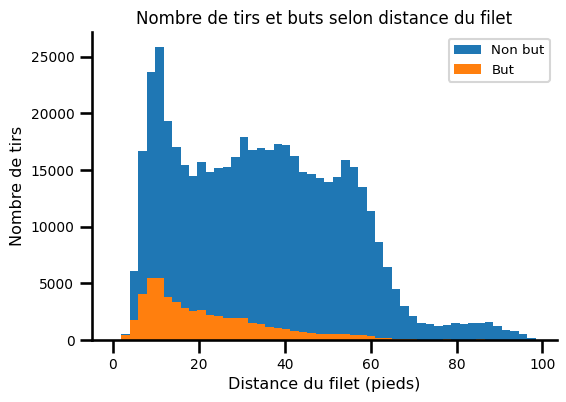

In [51]:
visualisation.hist_shots_goals_feature(data2, 'shot_distance', None, True)

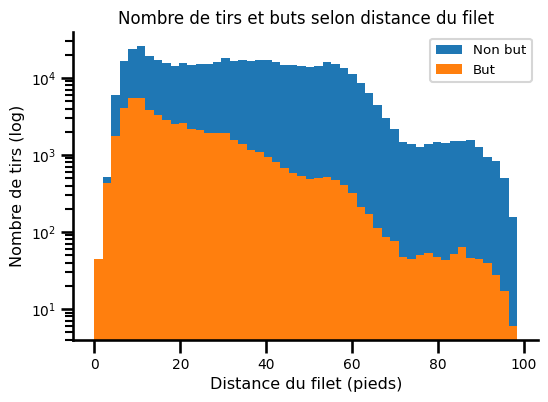

In [52]:
visualisation.hist_shots_goals_feature(data2, 'shot_distance', 'log', True)

### Histogramme du nombre de tirs selon l'angle du filet

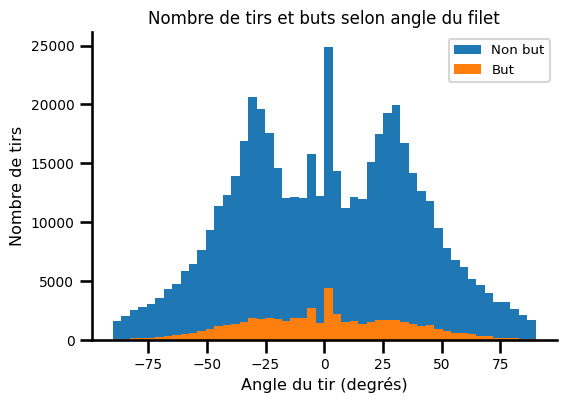

In [53]:
visualisation.hist_shots_goals_feature(data2, 'shot_angle', None, True)

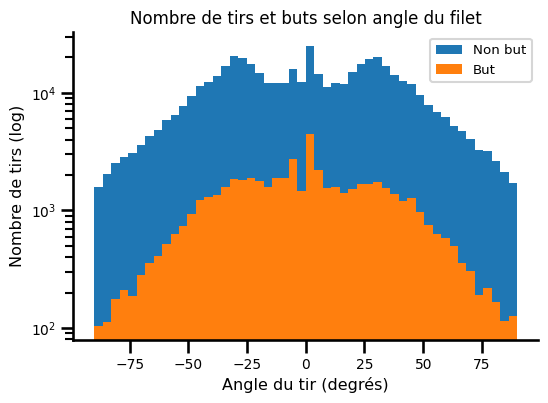

In [54]:
visualisation.hist_shots_goals_feature(data2, 'shot_angle', 'log', True)

### Taux de buts selon la distance du filet

In [56]:
data2.columns

Index(['gameId', 'evt_idx', 'prd', 'prdTime', 'team', 'coord_x', 'coord_y',
       'shotCategory', 'goalFlag', 'shotBy', 'goalieName', 'last_event_type',
       'last_event_x', 'last_event_y', 'time_since_last_event',
       'distance_from_last_event', 'power_play_time_elapsed',
       'home_team_skater_count', 'away_team_skater_count', 'visitorTeam',
       'hostTeam', 'homeRinkSide', 'awayRinkSide', 'game_seconds',
       'shot_distance', 'shot_angle', 'rebond', 'changement_angle_tir',
       'vitesse'],
      dtype='object')

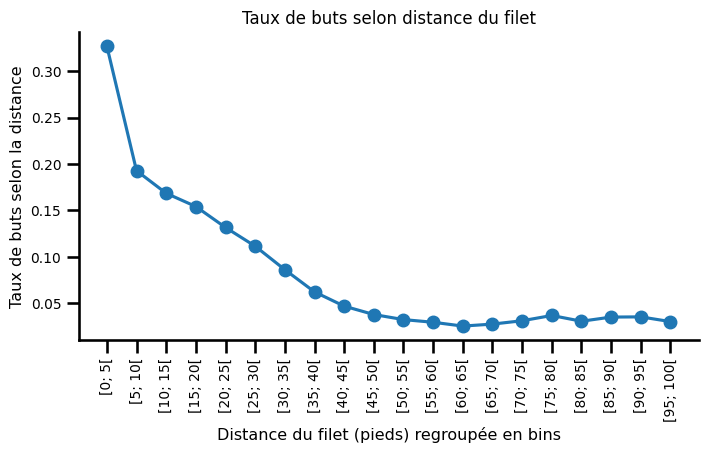

In [58]:
visualisation.goal_rate(data2, 'shot_distance', 0, 101, 5, True)

### Taux de buts selon l'angle de tir

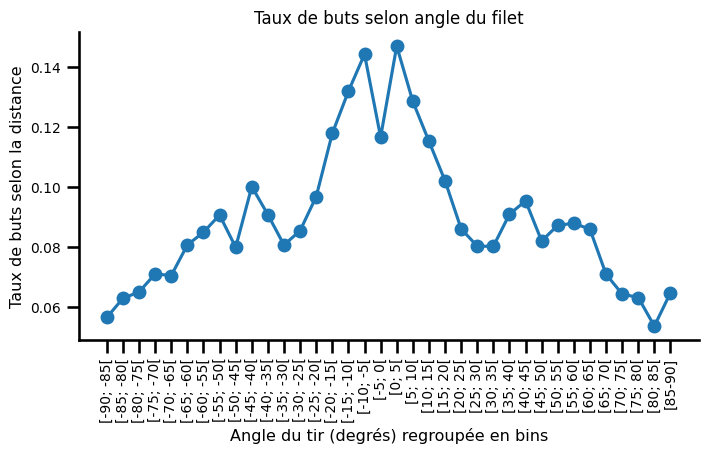

In [59]:
visualisation.goal_rate(data2, 'shot_angle', -90, 90, 5, True)

### Histogramme du nombre de buts selon la distance du filet (vide ou non-vide)

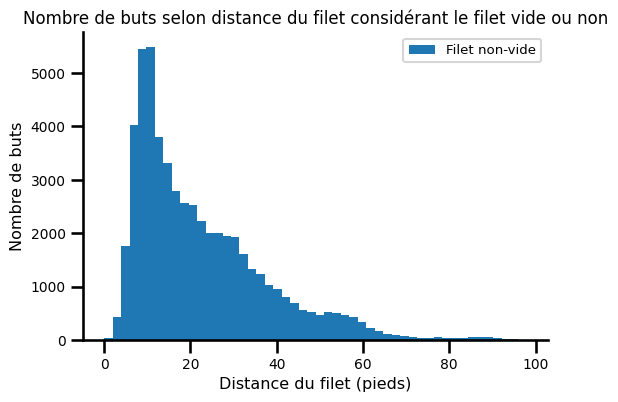

In [60]:
visualisation.hist_goals_dist(data2, None, True)

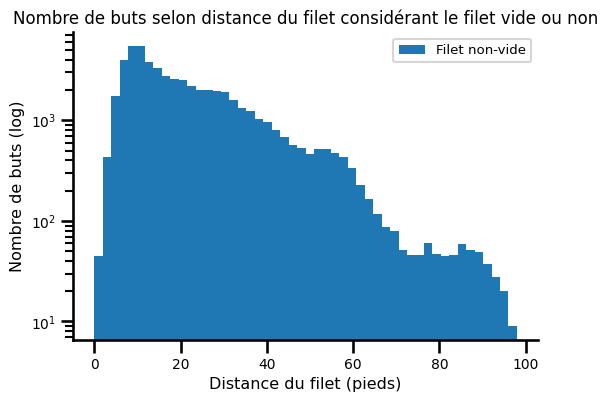

In [61]:
visualisation.hist_goals_dist(data2, 'log', True)

### Histogramme 2D du nombre de tirs intégrant la distance et l'angle

<Figure size 600x400 with 0 Axes>

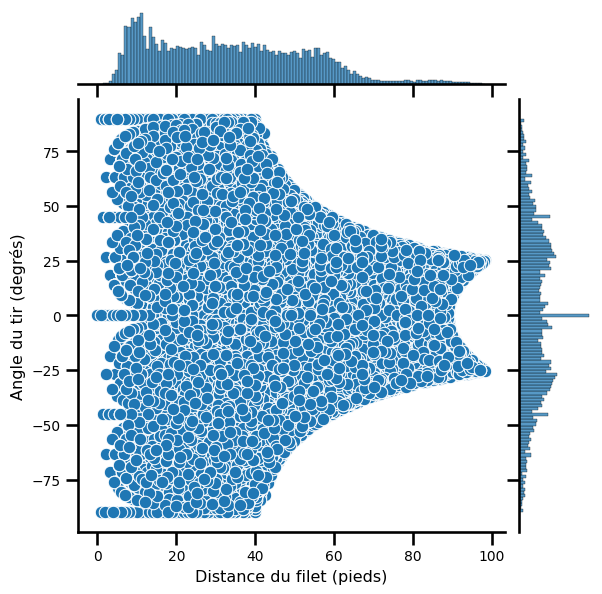

In [62]:
visualisation.hist_2d_shots(data=data2, x='shot_distance', y='shot_angle', hue=None, save=True)